In [1]:
from nbodykit.lab import cosmology
import matplotlib.pyplot as plt
import numpy as np

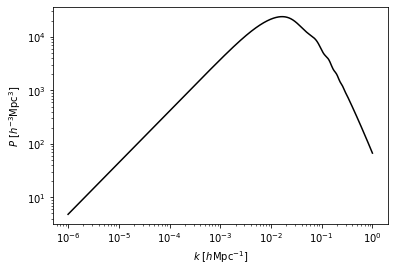

In [2]:
c = cosmology.Planck15
Plin = cosmology.LinearPower(c, redshift=0., transfer='EisensteinHu')


k = np.logspace(-6, 0, 5000)
plt.loglog(k, Plin(k), c='k')

plt.xlabel(r"$k$ $[h \mathrm{Mpc}^{-1}]$")
plt.ylabel(r"$P$ $[h^{-3} \mathrm{Mpc}^{3}]$")
plt.show()

In [3]:
def window(x):
    y = (3/x**3)*(np.sin(x)-x*np.cos(x))
    return y

0.6774
[6774.         1338.41129032  742.56375839  513.81733746  392.81183432
  317.93678161  267.03620274  230.18446602  202.27056673  180.39456522
  162.78862187  148.31367292  136.20270825  125.92033384  117.08148148
  109.40210943  102.66811011   96.71503497   91.41448637   86.66475196
   82.38421445   78.50662252   74.97763723   71.75226978   68.79295337
   66.06807325   63.55083285   61.21836961   59.05105853   57.03195876
   55.14636983   53.38147314   51.72604021   50.17019347   48.7052091
   47.32335329   46.01774574   44.78224501   43.61135199   42.50012804
   41.44412536   40.43932749   39.48209825   38.56913781   37.69744463
   36.86428254   36.06715202   35.30376516   34.57202375   33.87      ]
317.0576642823767


(0.0, 0.02)

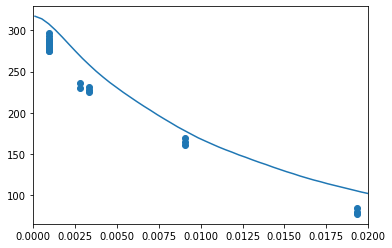

In [4]:
h = c.h
print(h)
omega = c.Omega0_cdm + c.Omega0_b
omega_l = c.Omega0_lambda
n_boxes = 50
L_box_sizes = 1/(np.linspace(1E-4,2E-2,n_boxes)) * h
print(L_box_sizes)
sigma_vel = np.zeros(n_boxes)
norm = 100 * h * omega**0.6 + (omega_l/70)*(1+omega/2)
#norm2 = np.sqrt(np.pi/(3.0*np.pi - 8))
#print('2', norm2)
R = 0.2 * h 
for i in range(n_boxes):
    L_box = L_box_sizes[i]
    k_box = 2.0*np.pi/L_box
    plink = Plin(k)
    ii = k<k_box
    new_plink = plink.copy()
    new_plink[ii] = 0
    W2 = window(k*R)**2
    sigma_minus_1 = np.sqrt(np.trapz(new_plink*W2, k)/(2.0*np.pi**2))
    sigma_0 = np.sqrt(np.trapz(new_plink*W2*k*k, k)/(2.0*np.pi**2))
    sigma_1 = np.sqrt(np.trapz(new_plink*W2*k*k*k*k, k)/(2.0*np.pi**2))
    sigma_vel[i] = norm * (sigma_minus_1) * np.sqrt(1.0 - sigma_0**4/(sigma_1**2 * sigma_minus_1**2))

v = np.array([79.39,77.33,84.09,161.47, 164.65, 169.06, 225.01, 228.01, 231.17,
     236.16, 230.26, 287.90, 280.57, 283.48, 288.06, 296.87 , 293.44,
     274.61, 279.81 , 280.67, 279.11, 281.28, 285.81, 285.14 , 286.30, 
     289.23, 278.45, 277.81, 274.83, 277.62, 277.66])
len(v)
L = np.array([51.7, 51.7, 51.7, 110.7, 110.7, 110.7, 302.6, 302.6, 302.6, 
             357.14, 357.14, 1074.62, 1074.62, 1074.62, 1074.62, 1074.62, 
            1074.62, 1074.62, 1074.62, 1074.62, 1074.62, 1074.62, 1074.62,
            1074.62, 1074.62, 1074.62, 1074.62, 1074.62, 1074.62, 1074.62, 1074.62])
x = 1/L
y = v

plt.plot(1/(L_box_sizes/h), sigma_vel)
plt.scatter(1/L, y)
print(sigma_vel[0])
plt.xlim(0,0.02)

In [6]:
f = open('linear_theory.txt', 'w')

for i in range(n_boxes):
    f.write('{} {}\n'.format(1/(L_box_sizes[i]/h), sigma_vel[i]))

f.close()

